In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

#  Sex Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train.Sex.dtypes

dtype('O')

In [ ]:
train.Sex.isnull().sum()

0

In [ ]:
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [ ]:
train.Sex.shape

(891,)

In [ ]:
#Try to decompose it into Males and Females.
train["Sex"] = np.where(train['Sex'] == 'female',1 ,0)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
train.Sex.describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [ ]:
train.Sex.dtypes

dtype('int64')

In [ ]:
train.Sex.count()

891

In [ ]:
"""
sem(arr, axis=0, ddof=0) function is used to 
compute the standard error of the mean of the input data.

The standard error of the mean, or simply standard error,
indicates how different the population mean is
likely to be from a sample mean
"""

SEM_percentage =  train.Sex.sem() * 100
SEM_percentage

1.601326988563368

In [ ]:
train.groupby('Sex').aggregate('count')

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
0,577,577,577,577,453,577,577,577,577,107,577
1,314,314,314,314,261,314,314,314,314,97,312


In [ ]:
train.groupby('Sex').aggregate('sum')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,262043,109,1379,13919.17,248,136,14727.2865
1,135343,233,678,7286.00,218,204,13966.6628


In [ ]:
train.groupby('Sex').aggregate('mean')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
1,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818


In [ ]:
train.groupby('Sex').aggregate('median')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,464.0,0.0,3.0,29.0,0.0,0.0,10.5
1,414.5,1.0,2.0,27.0,0.0,0.0,23.0


In [ ]:
train.groupby('Sex').aggregate('std')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,257.486139,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263
1,256.846324,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698


In [ ]:
np.sort(train.Sex)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
train.Sex.agg(['count', 'mean', 'std', 'sum', 'max', 'min'])

count    891.000000
mean       0.352413
std        0.477990
sum      314.000000
max        1.000000
min        0.000000
Name: Sex, dtype: float64

In [ ]:
train.Sex.describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,0,1
Survived,,
0,468,81
1,109,233


Text(0.5, 1.0, 'Evaluations of Gender Distributions')

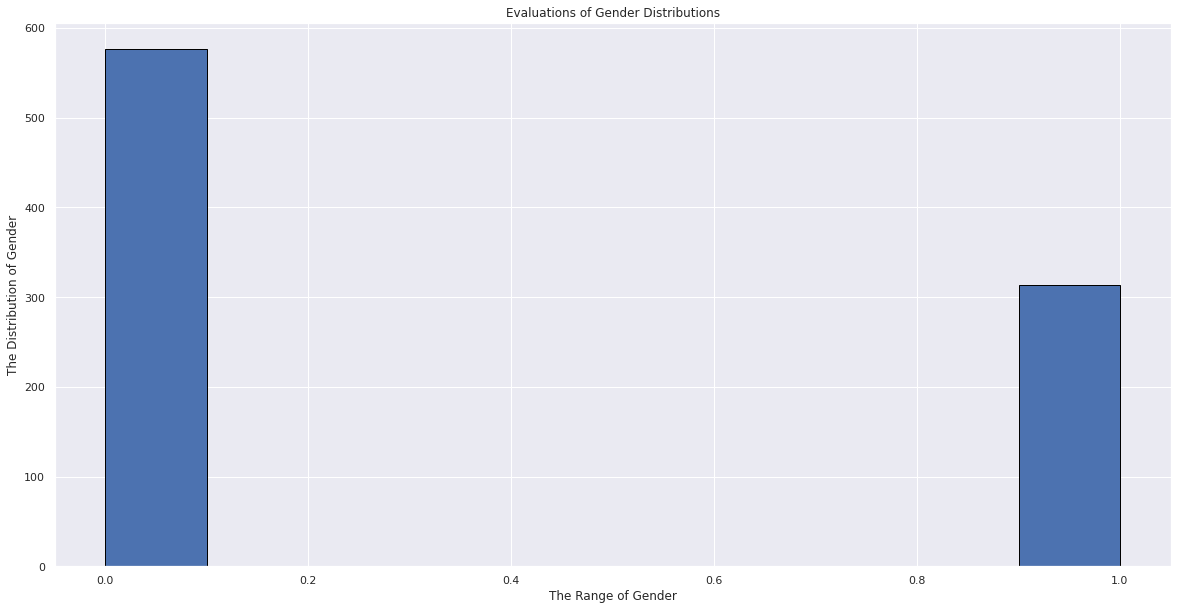

In [146]:
train.Sex.plot.hist(edgecolor = "black", figsize=(20,10))
plt.xlabel('The Range of Gender')
plt.ylabel('The Distribution of Gender')
plt.title('Evaluations of Gender Distributions')

Text(0.5, 1.0, 'Evaluations of Gender Distributions')

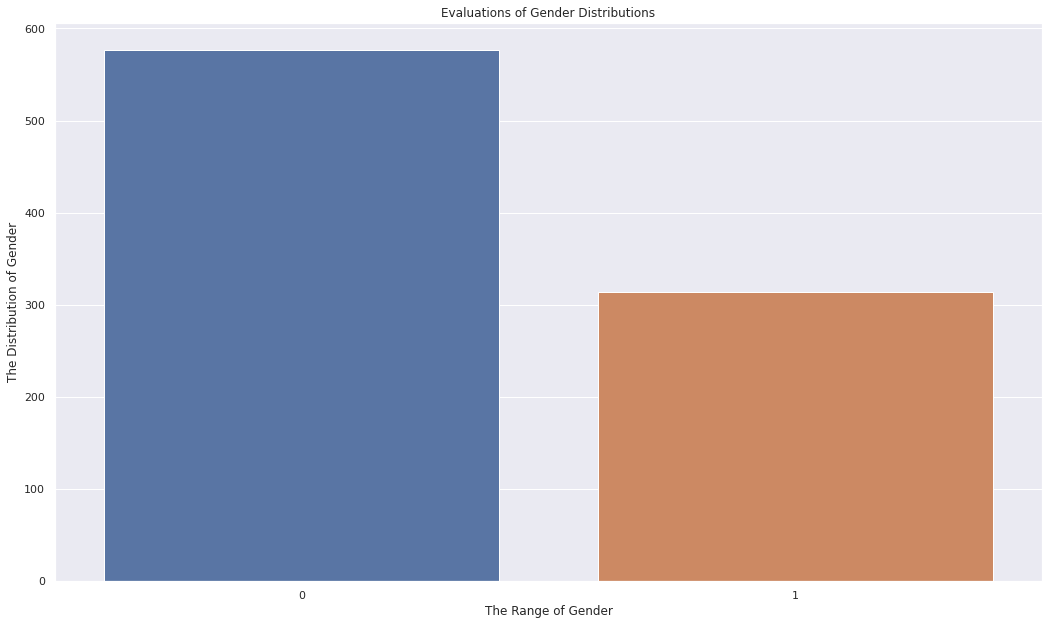

In [147]:
sns.set(rc={'figure.figsize':(17.7,10.27)})
sns.countplot(x="Sex", data=train)
plt.xlabel('The Range of Gender')
plt.ylabel('The Distribution of Gender')
plt.title('Evaluations of Gender Distributions')

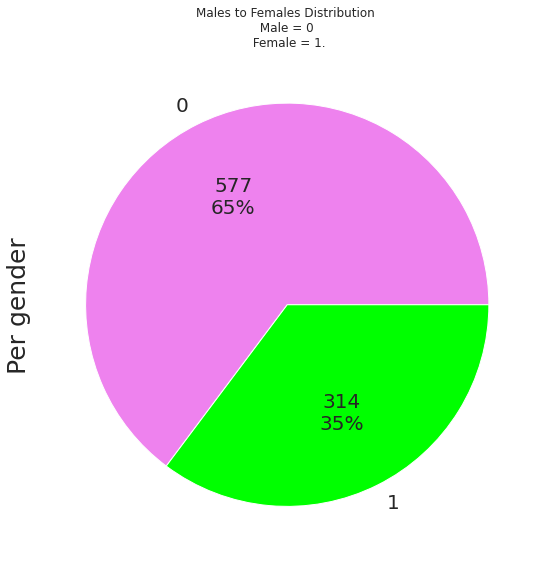

In [ ]:
def label_function(val):
    return f'{val / 100 * len(train.Sex):.0f}\n{val:.0f}%'



fig, ax = plt.subplots(figsize=(15, 8))

train.groupby('Sex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax = ax)
plt.title('Males to Females Distribution \n Male = 0 \n Female = 1.')
ax.set_ylabel('Per gender', size=25)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

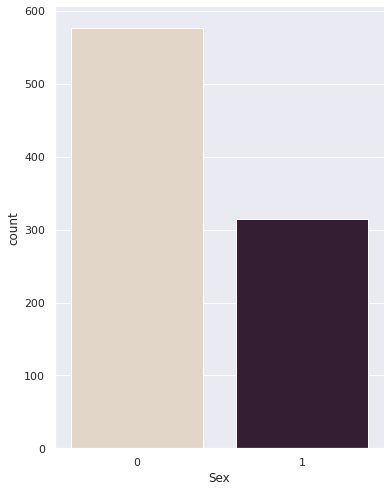

In [ ]:
plt.figure(figsize=(20, 10))

sns.catplot(data=train, x="Sex", kind="count", height=7, aspect=.8, palette="ch:.25")